DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start="2019-01-01", end="2021-12-31", freq="D")
sales = np.random.normal(loc=200, scale=50, size=len(dates))

# Inject anomalies during festive months
for i in range(len(dates)):
    if dates[i].month in [11, 12]:  # holiday spike
        sales[i] += np.random.normal(100, 40)
    if dates[i].month in [4, 7]:  # dip due to off-season
        sales[i] -= np.random.normal(80, 30)

df = pd.DataFrame({"Date": dates, "Sales": sales})
df["Sales"] = df["Sales"].clip(lower=0)  # no negative sales
df.to_csv("retail_sales.csv", index=False)


## Questions:
1. Which months tend to show unexpected spikes or drops in sales across years?

2. Can you visually highlight anomalies? (e.g., unusually high/low sales compared to monthly average)

3. What insights can a business derive from this? Suggest 1 concrete action.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1096 non-null   datetime64[ns]
 1   Sales   1096 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [3]:
df.head()

,Date,Sales
0,2019-01-01,224.835708
1,2019-01-02,193.086785
2,2019-01-03,232.384427
3,2019-01-04,276.151493
4,2019-01-05,188.292331


In [4]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['date'] = df['Date'].dt.day

In [5]:
df[['date','month','year']]

,date,month,year
0,1,1,2019
1,2,1,2019
2,3,1,2019
3,4,1,2019
4,5,1,2019
...,...,...,...
1091,27,12,2021
1092,28,12,2021
1093,29,12,2021
1094,30,12,2021


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1096 non-null   datetime64[ns]
 1   Sales   1096 non-null   float64       
 2   year    1096 non-null   int32         
 3   month   1096 non-null   int32         
 4   date    1096 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 30.1 KB


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
monthly_avg = df.groupby("month")["Sales"].mean().reset_index()
monthly_avg


,month,Sales
0,1,197.077821
1,2,204.978727
2,3,197.643059
3,4,120.918350
4,5,201.246304
5,6,206.925106
6,7,119.679729
7,8,203.451737
8,9,198.981215
9,10,204.680308


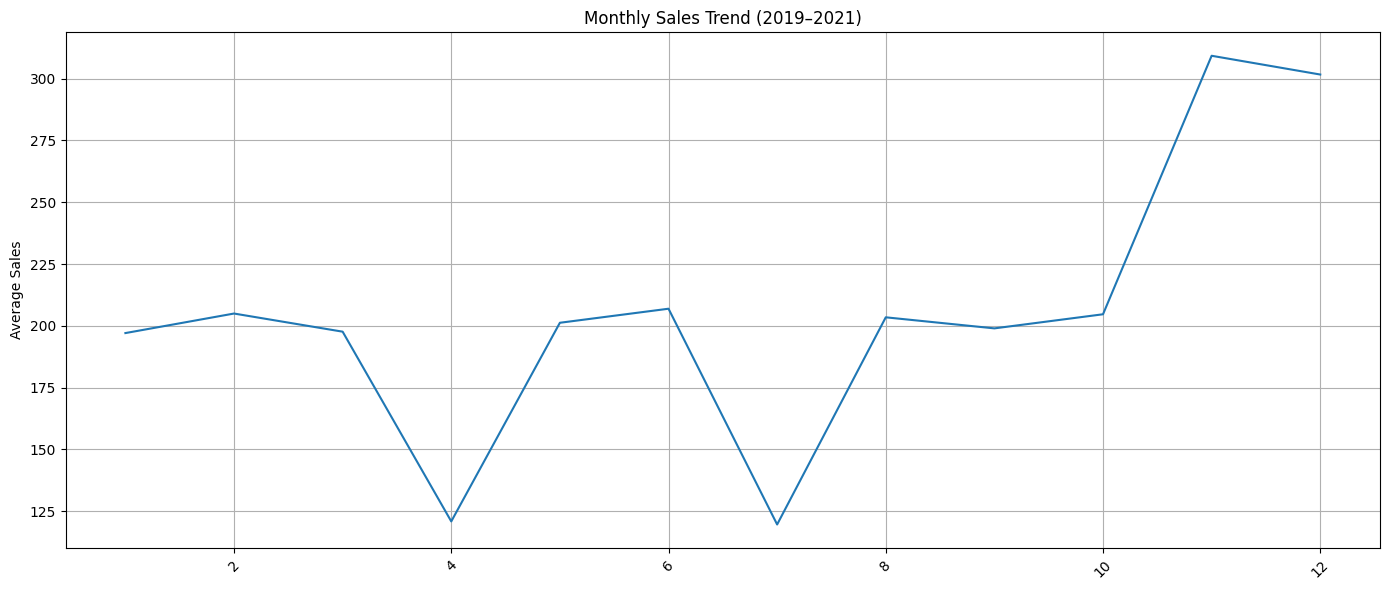

In [9]:
plt.figure(figsize=(14,6))
plt.plot(monthly_avg["month"], monthly_avg["Sales"], label='Monthly Average')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend (2019–2021)")
plt.ylabel("Average Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Add a 3-month rolling average column
monthly_avg['RollingAvg_3M'] = monthly_avg['Sales'].rolling(window=3).mean()


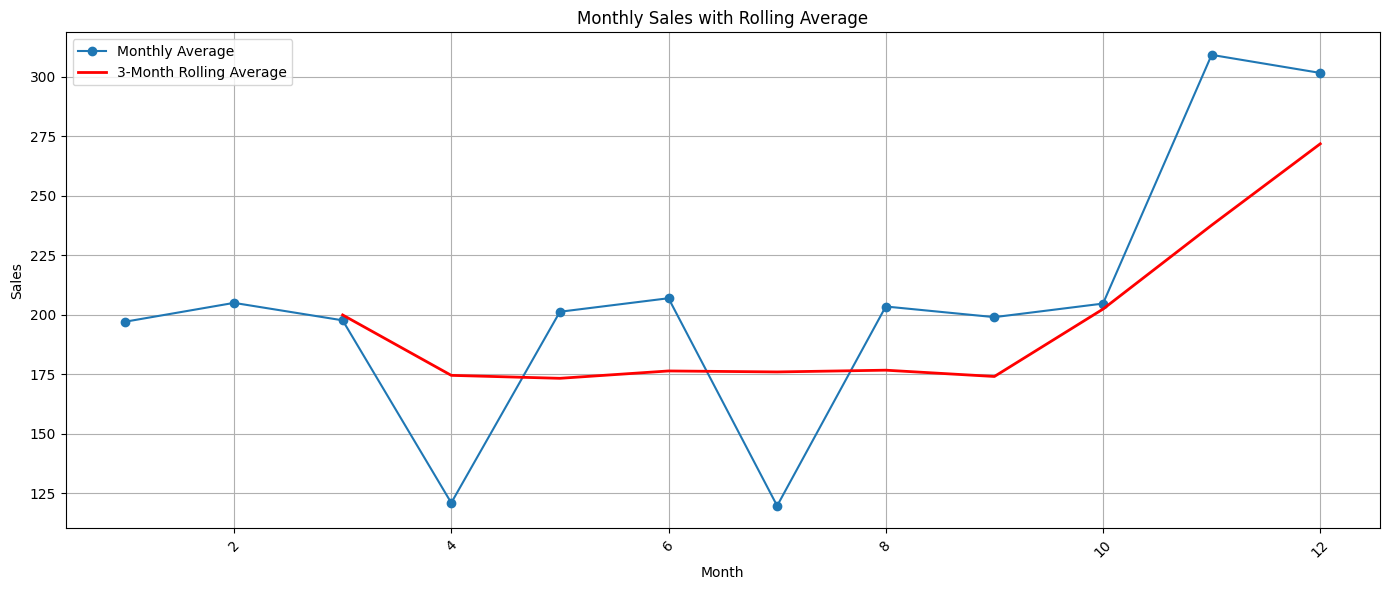

In [11]:
plt.figure(figsize=(14,6))
plt.plot(monthly_avg['month'], monthly_avg['Sales'], label='Monthly Average', marker='o')
plt.plot(monthly_avg['month'], monthly_avg['RollingAvg_3M'], label='3-Month Rolling Average', color='red', linewidth=2)

plt.title("Monthly Sales with Rolling Average")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


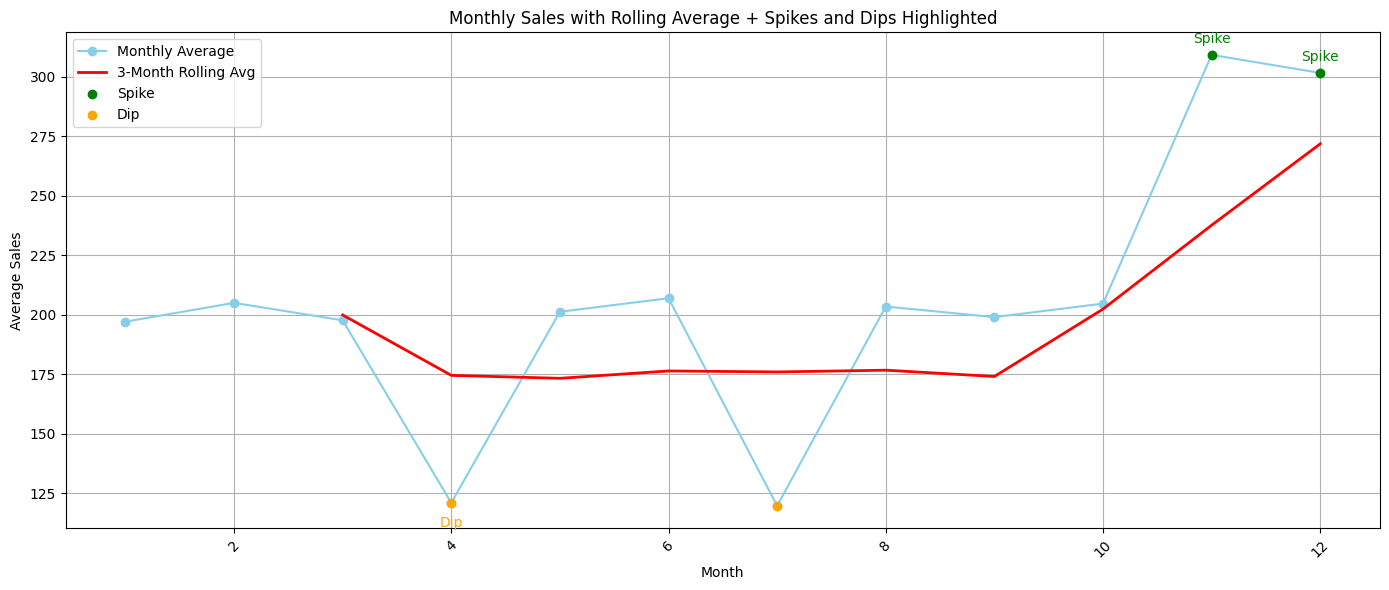

In [13]:
# Identify spikes (sales > 1 std dev above mean) and dips (sales < 1 std dev below mean)
mean_sales = monthly_avg['Sales'].mean()
std_sales = monthly_avg['Sales'].std()
monthly_avg['Spike'] = monthly_avg['Sales'] > (mean_sales + std_sales)
monthly_avg['Dip'] = monthly_avg['Sales'] < (mean_sales - std_sales)

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_avg['month'], monthly_avg['Sales'], label='Monthly Average', marker='o', color='skyblue')
plt.plot(monthly_avg['month'], monthly_avg['RollingAvg_3M'], label='3-Month Rolling Avg', color='red', linewidth=2)

# Highlight spikes
spike_points = monthly_avg[monthly_avg['Spike']]
plt.scatter(spike_points['month'], spike_points['Sales'], color='green', label='Spike', zorder=5)
for i, row in spike_points.iterrows():
    plt.annotate('Spike', (row['month'], row['Sales'] + 5), color='green', ha='center')

# Highlight dips
dip_points = monthly_avg[monthly_avg['Dip']]
plt.scatter(dip_points['month'], dip_points['Sales'], color='orange', label='Dip', zorder=5)
for i, row in dip_points.iterrows():
    plt.annotate('Dip', (row['month'], row['Sales'] - 10), color='orange', ha='center')

# Styling
plt.title("Monthly Sales with Rolling Average + Spikes and Dips Highlighted")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
